<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
#Read CSV
house_csv = "DATA/Sacramento_transactions.csv"

#load CSV into a DataFrame
df = pd.read_csv(house_csv)

In [3]:
df.shape

(985, 12)

In [4]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [6]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [7]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [10]:
#changing zip to a catagorical variable
df['zip'] = df.zip.astype('str')

In [11]:
df.zip.dtype

dtype('O')

In [12]:
#dtype('0') indicates it is a string. where as if its and int it would say
df.price.dtype

dtype('int64')

(array([917.,   0.,   0.,  54.,   0.,   0.,  13.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

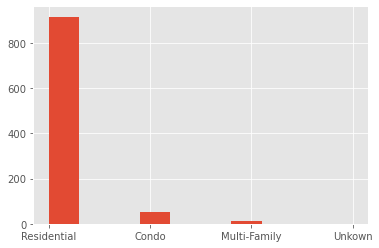

In [13]:
plt.hist(x='type',data=df)

In [37]:
df.min()

street                   1 KENNELFORD CIR
city                             ANTELOPE
zip                                 95603
state                                  CA
beds                                    0
baths                                   0
sq__ft                                  0
type                                Condo
sale_date    Fri May 16 00:00:00 EDT 2008
price                                1551
latitude                        38.241514
longitude                     -121.551704
dtype: object

In [38]:
#we see a few houses with 0 bedrooms. I will discard these from our data. Alternative approach would be to do an estimate of bedrooms based on the value of the house
df = df[df.beds != 0]

In [39]:
df.beds.min()

1

In [40]:
#I will also drop observations with sq__ft at 0
df = df[df.sq__ft != 0]

In [41]:
df.min()

street                   1 KENNELFORD CIR
city                             ANTELOPE
zip                                 95603
state                                  CA
beds                                    1
baths                                   1
sq__ft                                484
type                                Condo
sale_date    Fri May 16 00:00:00 EDT 2008
price                                2000
latitude                        38.241514
longitude                     -121.550527
dtype: object

In [42]:
1-814/985

0.17360406091370562

In [43]:
#with my approach we have discarded ~20% of the data this is quite high and a smarter aproach might have been to estimate the number of bedrooms based on price and sq__ft

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [44]:
# ANSWER
#Target variable is the price as we want to predict the house price

#### 2.2 List all possible variables which might be Independent/Predictor variable.

##### ANSWER
beds, baths, sq__ft, zip, latitude, longitude

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [45]:
# ANSWER
df.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


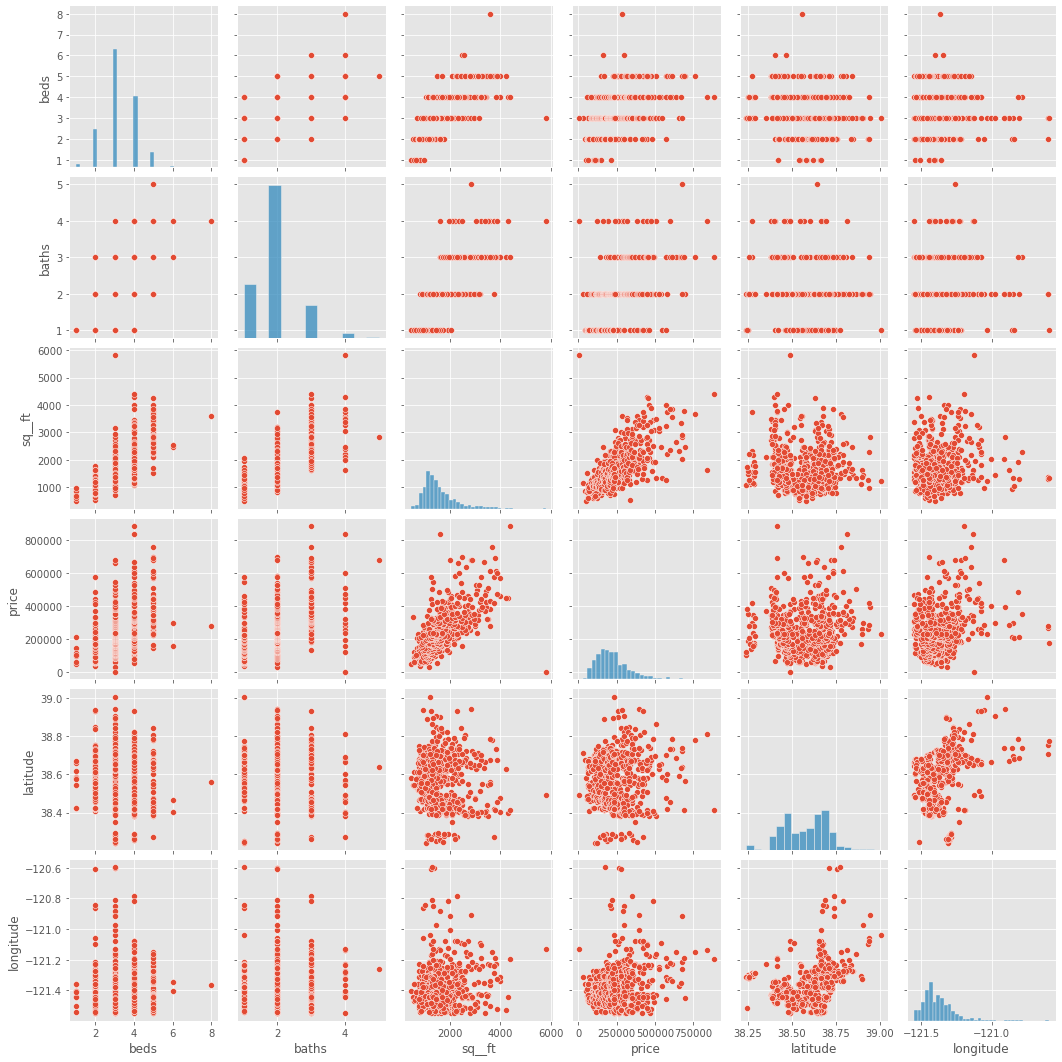

In [46]:
import seaborn as sns
sns.pairplot(data=df)

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [47]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [48]:
# ANSWER
X = df['sq__ft'].values.reshape(-1,1)
Y = df['price']

lr = LinearRegression()
lr.fit(X,Y)

lr.coef_, lr.intercept_

(array([125.21648668]), 30210.633866919146)

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [49]:
# ANSWER
lr.score(X,Y)

0.4812307133326901

### 3. Splitting Data

In [50]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [51]:
# ANSWER
## Create training and testing subsets
#using the train test spilt function we devide our df into two sets. 33% will be our test set and 67% will be our training set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [52]:
# ANSWER
## Check training/test data
type(X_train),type(X_test),type(Y_train),type(Y_test)

(numpy.ndarray,
 numpy.ndarray,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [53]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((545, 1), (269, 1), (545,), (269,))

In [54]:
type(X_test)

numpy.ndarray

In [55]:
def samp(array, size=5):
    if isinstance(array, np.ndarray):
        flat = array.flatten()
        rng = np.random.default_rng(42)
        sample = rng.choice(flat,size=size)
    elif isinstance(array, pd.core.series.Series):
        sample = array.sample(size)
    
    return sample

In [56]:
print(f'Sample X_test: {samp(X_test)}')
print('')
print(f'Sample X_train: {samp(X_train)}')
print('')
print(f'Sample Y_test: \n{samp(Y_test)}')
print('')
print(f'Sample Y_train: \n{samp(Y_train)}')

Sample X_test: [ 760 1477 1627 1309 2093]

Sample X_train: [ 956  800 1843 1320 1776]

Sample Y_test: 
817    360000
723    229000
263    264469
633    130000
879    104000
Name: price, dtype: int64

Sample Y_train: 
94     250134
974    225000
435    220000
892    126854
742    250000
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [61]:
# ANSWER
lr = LinearRegression()
lr.fit(X_train,Y_train)

print(lr.coef_, lr.intercept_)

[123.99646679] 33320.16111883655


In [62]:
# ANSWER
lr.score(X_test,Y_test)

0.44917703281062393


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [64]:
# ANSWER
#y = β0(intercept) + β1(coefficiency)*x
#x = sq__ft (Predictor) = 1204
print((lr.intercept_+lr.coef_*1204))

[182611.9071335]


#### Find the error

In [66]:
# Predict price from X_test
Price_pre = lr.predict(X_test)
samp(Price_pre)

array([127557.47587892, 216462.94256706, 235062.4125855 , 195631.53614641,
       292844.76610944])

In [68]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Price_pre, squared=True)

6873464361.755377



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



